Iteration 1: Global Best Z = 2.72926 at [np.float64(0.40239205943804957), np.float64(0.0012007922714691033)]
Iteration 2: Global Best Z = 2.32810 at [np.float64(0.3023920594380496), np.float64(0.10120079227146911)]
Iteration 3: Global Best Z = 2.16189 at [np.float64(0.20239205943804958), np.float64(0.20120079227146911)]
Iteration 4: Global Best Z = 2.16189 at [np.float64(0.20239205943804958), np.float64(0.20120079227146911)]
Iteration 5: Global Best Z = 2.16189 at [np.float64(0.20239205943804958), np.float64(0.20120079227146911)]
Iteration 6: Global Best Z = 1.76264 at [np.float64(-0.2434481456985382), np.float64(0.0480664531346274)]
Iteration 7: Global Best Z = 1.45423 at [np.float64(-0.1434481456985382), np.float64(0.1480664531346274)]
Iteration 8: Global Best Z = 0.57628 at [np.float64(-0.04344814569853819), np.float64(0.09675631983023983)]
Iteration 9: Global Best Z = 0.24435 at [np.float64(-0.01194060134938732), np.float64(0.055522763312698856)]
Iteration 10: Global Best Z = 0.244

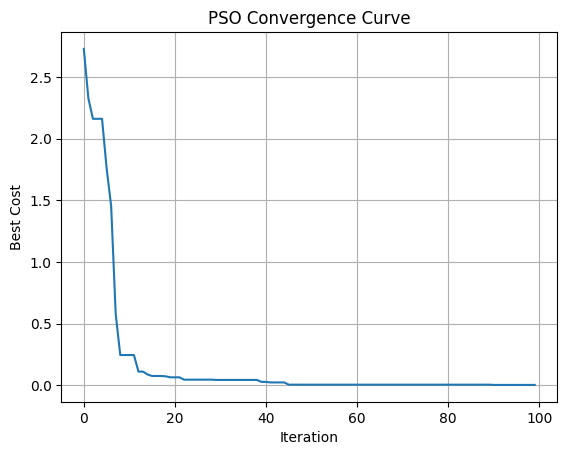


Final Global Best Position: [np.float64(0.0005282490387852196), np.float64(0.0003620168727435126)]
Final Global Best Cost: 0.0018222254350956923


In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Problem constants
DIMENSIONS = 2
B_LO = -5
B_HI = 5
POPULATION = 20
V_MAX = 0.1
PERSONAL_C = 2.0
SOCIAL_C = 2.0
CONVERGENCE = 0.001
MAX_ITER = 100

# Cost Function (Ackley Function)
def cost_function(x, y, a=20, b=0.2, c=2 * math.pi):
    term_1 = np.exp(-b * np.sqrt(0.5 * (x**2 + y**2)))
    term_2 = np.exp(0.5 * (np.cos(c * x) + np.cos(c * y)))
    return -a * term_1 - term_2 + a + math.e

# Particle Class
class Particle:
    def __init__(self, x, y, z, velocity):
        self.pos = [x, y]
        self.pos_z = z
        self.velocity = velocity
        self.best_pos = self.pos.copy()
        self.best_pos_z = z

# Swarm Class
class Swarm:
    def __init__(self, pop, v_max):
        self.particles = []
        self.best_pos = None
        self.best_pos_z = math.inf

        for _ in range(pop):
            x = np.random.uniform(B_LO, B_HI)
            y = np.random.uniform(B_LO, B_HI)
            z = cost_function(x, y)
            velocity = np.random.uniform(-v_max, v_max, 2)

            particle = Particle(x, y, z, velocity)
            self.particles.append(particle)

            # Update global best
            if z < self.best_pos_z:
                self.best_pos = [x, y]
                self.best_pos_z = z

# PSO Algorithm
def particle_swarm_optimization():
    swarm = Swarm(POPULATION, V_MAX)
    iteration = 0
    convergence_curve = []

    while iteration < MAX_ITER and swarm.best_pos_z > CONVERGENCE:
        for particle in swarm.particles:
            for d in range(DIMENSIONS):
                r1 = np.random.rand()
                r2 = np.random.rand()

                cognitive = PERSONAL_C * r1 * (particle.best_pos[d] - particle.pos[d])
                social = SOCIAL_C * r2 * (swarm.best_pos[d] - particle.pos[d])
                inertia = particle.velocity[d]

                # Update velocity and clip
                particle.velocity[d] = inertia + cognitive + social
                particle.velocity[d] = np.clip(particle.velocity[d], -V_MAX, V_MAX)

                # Update position and clip
                particle.pos[d] += particle.velocity[d]
                particle.pos[d] = np.clip(particle.pos[d], B_LO, B_HI)

            # Evaluate new position
            particle.pos_z = cost_function(particle.pos[0], particle.pos[1])

            # Update personal best
            if particle.pos_z < particle.best_pos_z:
                particle.best_pos = particle.pos.copy()
                particle.best_pos_z = particle.pos_z

            # Update global best
            if particle.pos_z < swarm.best_pos_z:
                swarm.best_pos = particle.pos.copy()
                swarm.best_pos_z = particle.pos_z

        convergence_curve.append(swarm.best_pos_z)
        print(f"Iteration {iteration + 1}: Global Best Z = {swarm.best_pos_z:.5f} at {swarm.best_pos}")
        iteration += 1

    # Plot convergence
    plt.plot(convergence_curve)
    plt.title("PSO Convergence Curve")
    plt.xlabel("Iteration")
    plt.ylabel("Best Cost")
    plt.grid()
    plt.show()

    print("\nFinal Global Best Position:", swarm.best_pos)
    print("Final Global Best Cost:", swarm.best_pos_z)

# Main Execution
if __name__ == "__main__":
    particle_swarm_optimization()
